**First, we import all the libraries that we will be using in this section**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#............

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedKFold

#............

from keras.models import Sequential
from keras.layers import Dense

#............

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#.....................................................


In [2]:
path_dataset=r'..\data\initialize_dataset.csv'
#.....................................................

---
### 1. **Load dataset .**

In [3]:
df=pd.read_csv(path_dataset)
df.head(5)

,topleft_x,topleft_y,rightdown_x,rightdown_y,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,leftHip_x,leftHip_y,rightHip_x,rightHip_y,tailBase_x,tailBase_y,tailEnd_x,tailEnd_y,center_x,center_y
0,128.549357,65.820937,343.968291,200.680474,132.377104,77.059977,154.363355,95.197897,167.807133,71.880164,201.120920,150.993897,213.729179,129.843165,229.917556,149.815392,332.780504,187.137346,236.258824,133.250705
1,182.812086,143.602228,283.598977,347.408787,259.303180,335.523716,252.674845,305.475251,229.917556,315.488459,225.595863,253.800711,198.693663,267.843947,206.515111,233.040787,248.008505,148.887415,233.205531,245.505508
2,323.281931,157.519263,470.461324,335.410553,381.936249,324.591375,418.334613,298.639752,389.658766,282.704663,451.601816,253.949019,417.024036,244.412569,430.181703,222.638718,346.434878,164.380057,396.871627,246.464908
3,26.225608,191.685630,183.768734,313.040632,74.518446,308.047809,70.616530,269.063588,36.025450,273.615046,116.980847,242.020260,77.787093,210.681555,125.234024,223.809760,173.479478,247.216590,104.997171,252.363131
4,329.321661,185.938033,546.875231,299.702867,535.775526,290.910586,532.401728,254.460285,519.045633,281.493936,468.441760,222.545986,455.720861,256.838787,432.002286,225.369593,337.339689,192.599096,438.098446,242.820450


In [4]:
df.shape

(737, 20)

---
### 2. **Declare feature vector and target variable.**

In [5]:
X=df.drop(['center_x','center_y'],axis=1)
y=df[['center_x','center_y']]
X.shape,y.shape

#.....................................................


((737, 18), (737, 2))

---
### 3. **Points scaling**


In [6]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(X)
scaler_y.fit(y)

Xscale=scaler_x.transform(X)
yscale=scaler_y.transform(y)

#..................................................


In [7]:
Xscale

array([[0.17415362, 0.3056688 , 0.54737485, ..., 0.42692123, 0.54397804,
        0.51485162],
       [0.26650805, 0.43805149, 0.44763517, ..., 0.62841497, 0.36175848,
        0.43525991],
       [0.5055858 , 0.46173809, 0.75636139, ..., 0.60323093, 0.57332846,
        0.46749751],
       ...,
       [0.51090165, 0.29999902, 0.86624443, ..., 0.13342775, 0.58071941,
        0.19321154],
       [0.41767875, 0.25791848, 0.86654146, ..., 0.06572066, 0.75741548,
        0.36008698],
       [0.49105682, 0.32894818, 0.8950437 , ..., 0.2073224 , 0.53090172,
        0.28513713]])

In [8]:
yscale

array([[0.31171559, 0.39488847],
       [0.30485054, 0.64728317],
       [0.67283885, 0.64944029],
       ...,
       [0.75111957, 0.22833792],
       [0.68974563, 0.09675184],
       [0.75760791, 0.15241014]])

---
### 4. **Split data into separate training and test set.**
Divide the data set into 70% for training and 30% for testing.


In [9]:
X_train,X_test,y_train,y_test=train_test_split(Xscale,yscale,test_size=0.3,random_state=42)
print('size train=',len(y_train),'; size test=',len(y_test))

#.....................................................


size train= 515 ; size test= 222


---
### 5. **Multlayer Perceptron (MLP) .** 

---
#### 5.1 **built Models.**


In [10]:
def Create_Model_One(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(18, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(9, activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse', optimizer='adam',metrics=['mse'])
    return model

#.................................................................

def Create_Model_Tow(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(18, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(9, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse', optimizer='adam',metrics=['mse'])
    return model

#.................................................................



**Evaluate a model using repeated k-fold cross-validation**

In [11]:
def Evaluate_Model(X, y,get_model_func,name):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    i=0
    for train_ix, test_ix in cv.split(X):
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        model= get_model_func(n_inputs, n_outputs)
        model.fit(X_train, y_train, verbose=0,epochs=100)
        mse = model.evaluate(X_test, y_test, verbose=0)[0]
        i+=1
        print(name,i,' ) MSE >%.6f' % mse)
        results.append(mse)
        
    print(name,'> MSE: %.6f (%.6f)' % (np.mean(results), np.std(results)))
    return results

#.................................................................



In [12]:
results_model_one = Evaluate_Model(Xscale, yscale,Create_Model_One,'Model_One')

#.................................................................


Model_One 1  ) MSE >0.000246
Model_One 2  ) MSE >0.000112
Model_One 3  ) MSE >0.000107
Model_One 4  ) MSE >0.000202
Model_One 5  ) MSE >0.000190
Model_One 6  ) MSE >0.000113
Model_One 7  ) MSE >0.000141
Model_One 8  ) MSE >0.000212
Model_One 9  ) MSE >0.000159
Model_One 10  ) MSE >0.000127
Model_One 11  ) MSE >0.000150
Model_One 12  ) MSE >0.000307
Model_One 13  ) MSE >0.000209
Model_One 14  ) MSE >0.000130
Model_One 15  ) MSE >0.000135
Model_One 16  ) MSE >0.000136
Model_One 17  ) MSE >0.000129
Model_One 18  ) MSE >0.000155
Model_One 19  ) MSE >0.000163
Model_One 20  ) MSE >0.000150
Model_One 21  ) MSE >0.000102
Model_One 22  ) MSE >0.000139
Model_One 23  ) MSE >0.000134
Model_One 24  ) MSE >0.000196
Model_One 25  ) MSE >0.000117
Model_One 26  ) MSE >0.000107
Model_One 27  ) MSE >0.000091
Model_One 28  ) MSE >0.000125
Model_One 29  ) MSE >0.000115
Model_One 30  ) MSE >0.000128
Model_One > MSE: 0.000151 (0.000047)


In [13]:
results_model_tow= Evaluate_Model(Xscale, yscale,Create_Model_Tow,'Model_Tow')

#.................................................................

Model_Tow 1  ) MSE >0.000208
Model_Tow 2  ) MSE >0.000219
Model_Tow 3  ) MSE >0.000167
Model_Tow 4  ) MSE >0.000148
Model_Tow 5  ) MSE >0.000126
Model_Tow 6  ) MSE >0.000099
Model_Tow 7  ) MSE >0.015533
Model_Tow 8  ) MSE >0.000152
Model_Tow 9  ) MSE >0.000141
Model_Tow 10  ) MSE >0.000133
Model_Tow 11  ) MSE >0.000191
Model_Tow 12  ) MSE >0.035338
Model_Tow 13  ) MSE >0.000084
Model_Tow 14  ) MSE >0.000187
Model_Tow 15  ) MSE >0.000200
Model_Tow 16  ) MSE >0.017919
Model_Tow 17  ) MSE >0.000160
Model_Tow 18  ) MSE >0.000186
Model_Tow 19  ) MSE >0.000148
Model_Tow 20  ) MSE >0.000185
Model_Tow 21  ) MSE >0.000123
Model_Tow 22  ) MSE >0.017041
Model_Tow 23  ) MSE >0.000166
Model_Tow 24  ) MSE >0.037817
Model_Tow 25  ) MSE >0.000172
Model_Tow 26  ) MSE >0.018892
Model_Tow 27  ) MSE >0.000122
Model_Tow 28  ) MSE >0.000122
Model_Tow 29  ) MSE >0.037281
Model_Tow 30  ) MSE >0.012066
Model_Tow > MSE: 0.006511 (0.011765)


---

In [14]:
sc={'Model_One MSE':results_model_one,
    'Model_Tow MSE':results_model_tow
   }
pd.DataFrame(data=sc).describe().T

#.................................................................


,count,mean,std,min,25%,50%,75%,max
Model_One MSE,30.0,0.000151,0.000048,0.000091,0.000119,0.000136,0.000162,0.000307
Model_Tow MSE,30.0,0.006511,0.011967,0.000084,0.000142,0.000178,0.009104,0.037817


---
**Through the previous evaluation, it is clear that the first model is the best, because the mean is 0.000151, and the standard deviation is 0.000048 for the MSE, which is much less than the other model.**


`Once we have chosen an appropriate model configuration, we can use it to fit a final model on all available data and make predictions on new data.`

In [15]:
model=Create_Model_One(X_train.shape[1],y_train.shape[1])

View a summary of the structure of the MLP model.

In [16]:
model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 18)                342       
                                                                 
 dense_211 (Dense)           (None, 9)                 171       
                                                                 
 dense_212 (Dense)           (None, 2)                 20        
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


---
#### 5.2 **MLP Model Training.**


In [26]:
hist = model.fit(X_train, y_train, epochs=300,verbose=1)

Epoch 1/300
17/17 [==============================] - 0s 1ms/step - loss: 6.8794e-05 - mse: 6.8794e-05
Epoch 2/300
17/17 [==============================] - 0s 1ms/step - loss: 6.2998e-05 - mse: 6.2998e-05
Epoch 3/300
17/17 [==============================] - 0s 1ms/step - loss: 6.3486e-05 - mse: 6.3486e-05
Epoch 4/300
17/17 [==============================] - 0s 1ms/step - loss: 6.9531e-05 - mse: 6.9531e-05
Epoch 5/300
17/17 [==============================] - 0s 1ms/step - loss: 7.7629e-05 - mse: 7.7629e-05
Epoch 6/300
17/17 [==============================] - 0s 1ms/step - loss: 7.1818e-05 - mse: 7.1818e-05
Epoch 7/300
17/17 [==============================] - 0s 1ms/step - loss: 6.3838e-05 - mse: 6.3838e-05
Epoch 8/300
17/17 [==============================] - 0s 1ms/step - loss: 6.2495e-05 - mse: 6.2495e-05
Epoch 9/300
17/17 [==============================] - 0s 1ms/step - loss: 9.7888e-05 - mse: 9.7888e-05
Epoch 10/300
17/17 [==============================] - 0s 1ms/step - loss: 6.0499e-

17/17 [==============================] - 0s 1ms/step - loss: 4.1832e-05 - mse: 4.1832e-05
Epoch 81/300
17/17 [==============================] - 0s 1ms/step - loss: 4.3582e-05 - mse: 4.3582e-05
Epoch 82/300
17/17 [==============================] - 0s 1ms/step - loss: 4.7406e-05 - mse: 4.7406e-05
Epoch 83/300
17/17 [==============================] - 0s 1ms/step - loss: 4.4850e-05 - mse: 4.4850e-05
Epoch 84/300
17/17 [==============================] - 0s 1ms/step - loss: 5.3414e-05 - mse: 5.3414e-05
Epoch 85/300
17/17 [==============================] - 0s 1ms/step - loss: 3.4925e-05 - mse: 3.4925e-05
Epoch 86/300
17/17 [==============================] - 0s 1ms/step - loss: 3.6765e-05 - mse: 3.6765e-05
Epoch 87/300
17/17 [==============================] - 0s 1ms/step - loss: 4.4369e-05 - mse: 4.4369e-05
Epoch 88/300
17/17 [==============================] - 0s 1ms/step - loss: 4.9723e-05 - mse: 4.9723e-05
Epoch 89/300
17/17 [==============================] - 0s 1ms/step - loss: 3.6932e-05 -

17/17 [==============================] - 0s 1ms/step - loss: 1.9916e-05 - mse: 1.9916e-05
Epoch 160/300
17/17 [==============================] - 0s 1ms/step - loss: 2.8842e-05 - mse: 2.8842e-05
Epoch 161/300
17/17 [==============================] - 0s 1ms/step - loss: 2.4011e-05 - mse: 2.4011e-05
Epoch 162/300
17/17 [==============================] - 0s 1ms/step - loss: 2.2571e-05 - mse: 2.2571e-05
Epoch 163/300
17/17 [==============================] - 0s 1ms/step - loss: 2.0892e-05 - mse: 2.0892e-05
Epoch 164/300
17/17 [==============================] - 0s 1ms/step - loss: 2.0404e-05 - mse: 2.0404e-05
Epoch 165/300
17/17 [==============================] - 0s 1ms/step - loss: 2.9335e-05 - mse: 2.9335e-05
Epoch 166/300
17/17 [==============================] - 0s 1ms/step - loss: 2.4470e-05 - mse: 2.4470e-05
Epoch 167/300
17/17 [==============================] - 0s 1ms/step - loss: 1.9257e-05 - mse: 1.9257e-05
Epoch 168/300
17/17 [==============================] - 0s 1ms/step - loss: 2.2

17/17 [==============================] - 0s 1ms/step - loss: 1.4806e-05 - mse: 1.4806e-05
Epoch 238/300
17/17 [==============================] - 0s 1ms/step - loss: 1.1045e-05 - mse: 1.1045e-05
Epoch 239/300
17/17 [==============================] - 0s 1ms/step - loss: 1.0214e-05 - mse: 1.0214e-05
Epoch 240/300
17/17 [==============================] - 0s 1ms/step - loss: 1.1058e-05 - mse: 1.1058e-05
Epoch 241/300
17/17 [==============================] - 0s 1ms/step - loss: 9.3537e-06 - mse: 9.3537e-06
Epoch 242/300
17/17 [==============================] - 0s 1ms/step - loss: 1.8598e-05 - mse: 1.8598e-05
Epoch 243/300
17/17 [==============================] - 0s 1ms/step - loss: 1.1313e-05 - mse: 1.1313e-05
Epoch 244/300
17/17 [==============================] - 0s 1ms/step - loss: 1.0734e-05 - mse: 1.0734e-05
Epoch 245/300
17/17 [==============================] - 0s 1ms/step - loss: 8.3093e-06 - mse: 8.3093e-06
Epoch 246/300
17/17 [==============================] - 0s 1ms/step - loss: 1.7

---

**Training Loss**

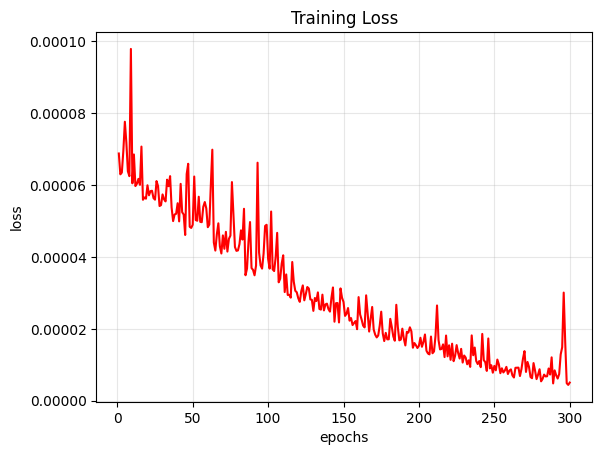

In [27]:
loss_values = hist.history['loss'] 
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values,color = 'red')
plt.title('Training Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid(alpha = 0.3)
plt.show()

---
#### 5.3 **Evaluating the model.**

In [28]:
score = model.evaluate(X_test, y_test,verbose=1)
print('MSE test data:',score[1])

7/7 [==============================] - 0s 1ms/step - loss: 9.7427e-06 - mse: 9.7427e-06
MSE test data: 9.742738257045858e-06


---
**centesr Test data vs centers prediction**

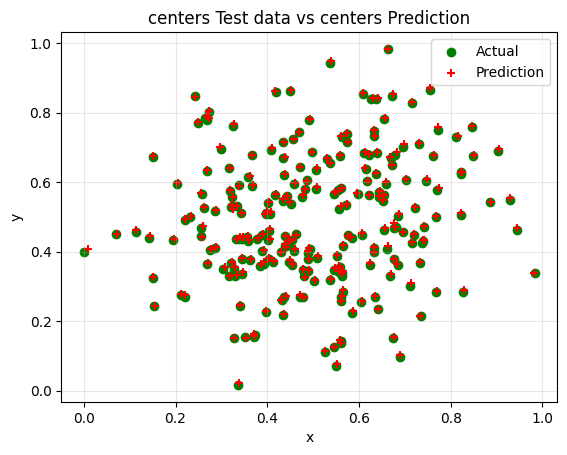

In [30]:
ytest_pred=model.predict(X_test,verbose=0)
plt.figure()

plt.scatter(y_test[:,0],y_test[:,1],color = 'green')
plt.scatter(ytest_pred[:,0],ytest_pred[:,1],marker='+',color = 'red')
plt.legend(['Actual','Prediction'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('centers Test data vs centers Prediction')
plt.grid(alpha = 0.3)
plt.show()

#..................................................


---
**x , y  Test data vs  x,y prediction**

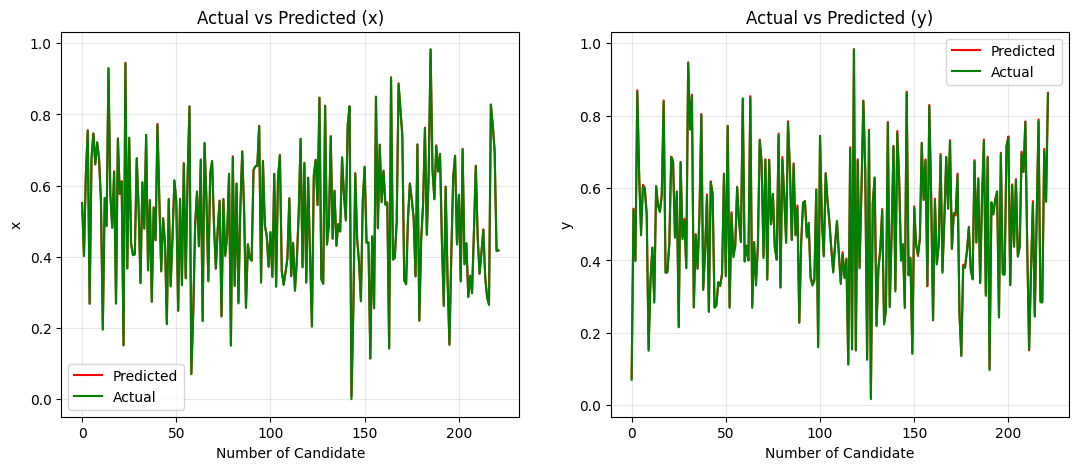

In [44]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)

plt.plot(ytest_pred[:,0], color = 'red', label = 'Predicted')
plt.plot(y_test[:,0], color = 'green', label = 'Actual')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('x')
plt.title('Actual vs Predicted (x)')
plt.legend()

#...........................................
plt.subplot(1,2,2)
plt.plot(ytest_pred[:,1], color = 'red', label = 'Predicted')
plt.plot(y_test[:,1], color = 'green', label = 'Actual')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('y')
plt.title('Actual vs Predicted (y)')
plt.legend()
plt.show()


---
#### 5.4 **Prediction.**

Prediction function

In [32]:
def Prediction(X,model,scaler_x,scaler_y):
    X=np.reshape(X,(-1,scaler_x.n_features_in_)) 
    Xscale=scaler_x.transform(X)
    y=model.predict(Xscale,verbose=0)
    yscale=scaler_y.inverse_transform(y)
    return yscale

#..........................................................


Prediction for 1 record

In [33]:
ypred=Prediction(X.values[0],model,scaler_x,scaler_y)
ypred

array([[236.32634, 135.07687]], dtype=float32)

Prediction for all records data set 

In [34]:
ypred=Prediction(X.values,model,scaler_x,scaler_y)
df['cunter_xpret']=ypred[:,0]
df['cunter_ypret']=ypred[:,1]
df.head()

,topleft_x,topleft_y,rightdown_x,rightdown_y,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,...,rightHip_x,rightHip_y,tailBase_x,tailBase_y,tailEnd_x,tailEnd_y,center_x,center_y,cunter_xpret,cunter_ypret
0,128.549357,65.820937,343.968291,200.680474,132.377104,77.059977,154.363355,95.197897,167.807133,71.880164,...,213.729179,129.843165,229.917556,149.815392,332.780504,187.137346,236.258824,133.250705,236.326340,135.076874
1,182.812086,143.602228,283.598977,347.408787,259.303180,335.523716,252.674845,305.475251,229.917556,315.488459,...,198.693663,267.843947,206.515111,233.040787,248.008505,148.887415,233.205531,245.505508,234.152908,246.567993
2,323.281931,157.519263,470.461324,335.410553,381.936249,324.591375,418.334613,298.639752,389.658766,282.704663,...,417.024036,244.412569,430.181703,222.638718,346.434878,164.380057,396.871627,246.464908,396.800690,247.123077
3,26.225608,191.685630,183.768734,313.040632,74.518446,308.047809,70.616530,269.063588,36.025450,273.615046,...,77.787093,210.681555,125.234024,223.809760,173.479478,247.216590,104.997171,252.363131,106.334404,254.177673
4,329.321661,185.938033,546.875231,299.702867,535.775526,290.910586,532.401728,254.460285,519.045633,281.493936,...,455.720861,256.838787,432.002286,225.369593,337.339689,192.599096,438.098446,242.820450,438.771912,244.688477


---
**Save model**

In [36]:
model.save('my_model.h5')